# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("discharge.csv")

array([[<Axes: title={'center': 'Voltage_measured'}>,
        <Axes: title={'center': 'Current_measured'}>,
        <Axes: title={'center': 'Temperature_measured'}>],
       [<Axes: title={'center': 'Current_charge'}>,
        <Axes: title={'center': 'Voltage_charge'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Capacity'}>,
        <Axes: title={'center': 'id_cycle'}>,
        <Axes: title={'center': 'ambient_temperature'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

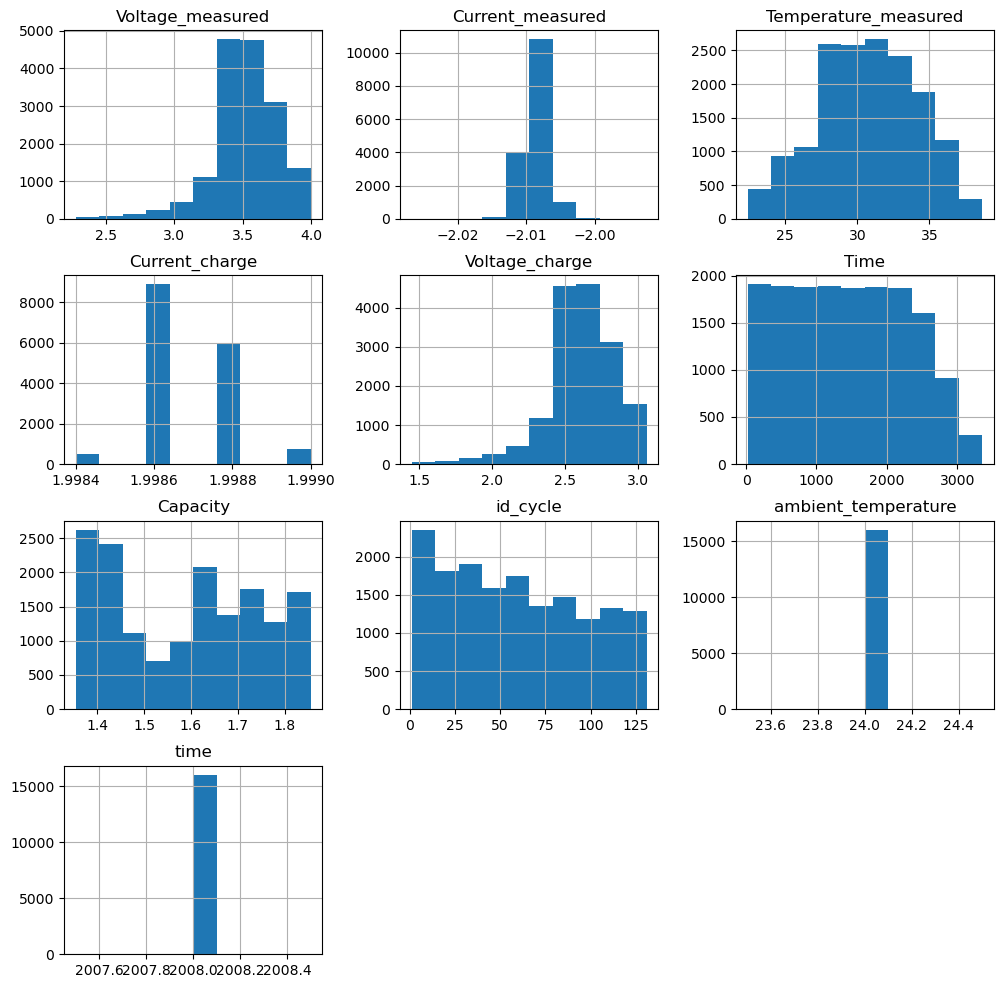

In [2]:
#Visualize data using histograms

data[data.id_cycle  & (data.Battery == "B0018")].hist(figsize=(12,12))

array([[<Axes: title={'center': 'Voltage_measured'}>,
        <Axes: title={'center': 'Current_measured'}>,
        <Axes: title={'center': 'Temperature_measured'}>],
       [<Axes: title={'center': 'Current_charge'}>,
        <Axes: title={'center': 'Voltage_charge'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Capacity'}>,
        <Axes: title={'center': 'id_cycle'}>,
        <Axes: title={'center': 'ambient_temperature'}>],
       [<Axes: title={'center': 'time'}>, <Axes: >, <Axes: >]],
      dtype=object)

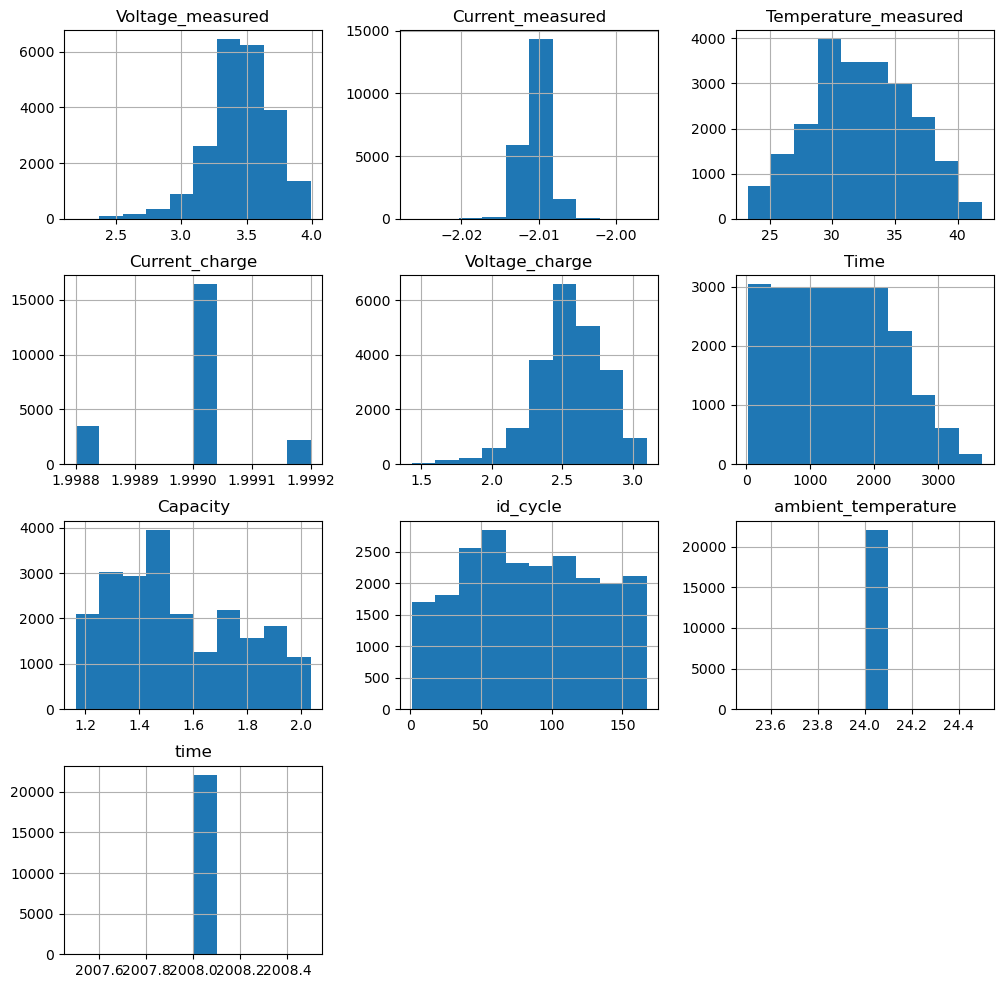

In [3]:
data[data.id_cycle  & (data.Battery == "B0006")].hist(figsize=(12,12))

In [4]:
#Adding voltage discharge rate [volts/second] and current discharge rate [amps/s]
time = data.Time.values
current = data.Current_measured.values
voltage = data.Voltage_measured.values

voltage_rate = np.gradient(voltage,edge_order=2) / np.gradient(time,edge_order=2)
current_rate = np.gradient(current,edge_order=2) / np.gradient(time,edge_order=2)

data["Voltage Rate"] = voltage_rate
data["Current Rate"] = current_rate

data.head(20)

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery,Voltage Rate,Current Rate
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005,-0.001443,-0.000199
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005,-0.001119,0.000038
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005,-0.000872,0.000027
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005,-0.000727,-0.000090
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005,-0.000633,0.000039
5,3.897036,-2.011603,25.317019,1.9982,2.967,126.453,1.856487,1,discharge,24,2008.0,B0005,-0.000562,-0.000099
6,3.887477,-2.018015,25.509423,1.9982,2.959,144.641,1.856487,1,discharge,24,2008.0,B0005,-0.000497,-0.000042
7,3.878959,-2.013135,25.703603,1.9982,2.951,162.844,1.856487,1,discharge,24,2008.0,B0005,-0.000453,0.000133
8,3.871016,-2.013162,25.887208,1.9982,2.943,181.016,1.856487,1,discharge,24,2008.0,B0005,-0.000426,0.000003
9,3.863480,-2.013030,26.077815,1.9982,2.935,199.219,1.856487,1,discharge,24,2008.0,B0005,-0.000395,-0.000015


array([[<Axes: title={'center': 'Voltage_measured'}>,
        <Axes: title={'center': 'Current_measured'}>,
        <Axes: title={'center': 'Temperature_measured'}>],
       [<Axes: title={'center': 'Current_charge'}>,
        <Axes: title={'center': 'Voltage_charge'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Capacity'}>,
        <Axes: title={'center': 'id_cycle'}>,
        <Axes: title={'center': 'ambient_temperature'}>],
       [<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'Voltage Rate'}>,
        <Axes: title={'center': 'Current Rate'}>]], dtype=object)

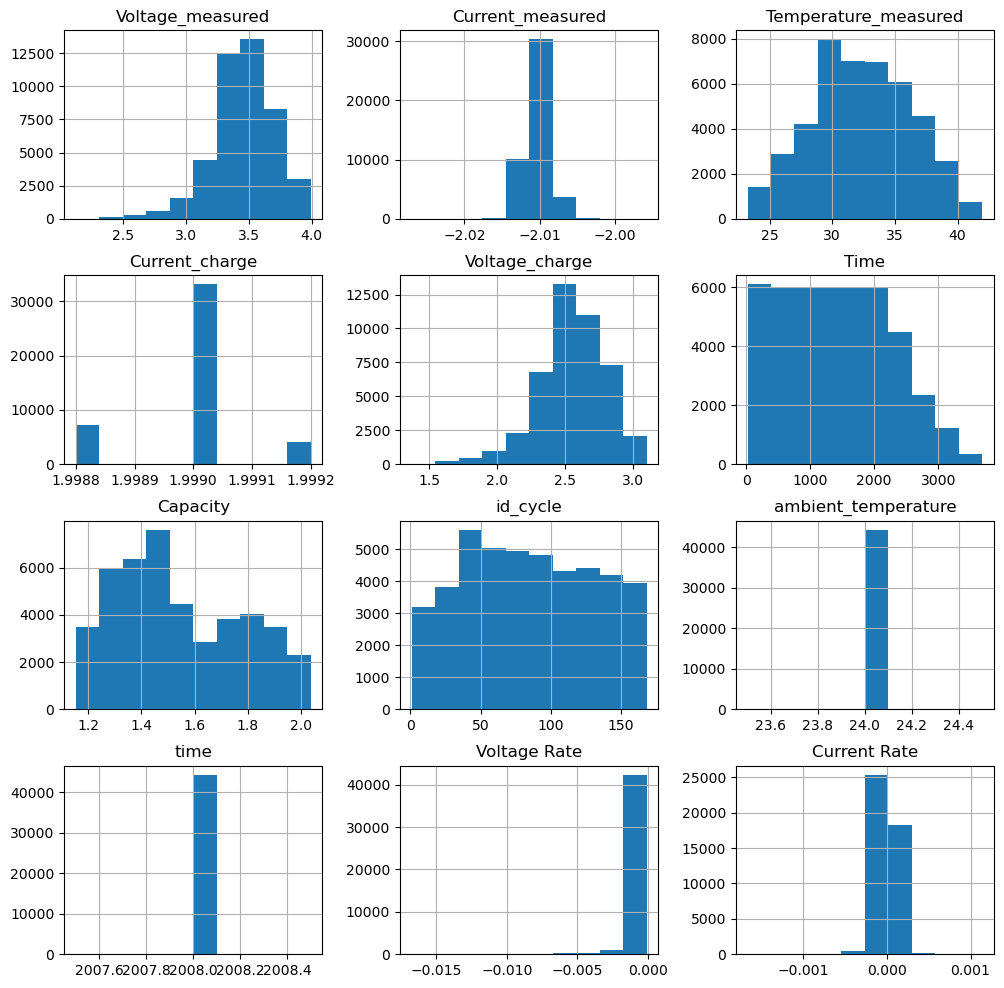

In [5]:
data[(data.Battery == "B0006")].hist(figsize=(12,12))

In [6]:
data.Battery.unique()

array(['B0005', 'B0006', 'B0007', 'B0018'], dtype=object)

# Feature Engineering

Use One Hot Encoding to transform battery labels



In [7]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

encoder = OneHotEncoder()
battery_encoded = encoder.fit_transform(data["Battery"].values.reshape(-1,1)).toarray()
labels = encoder.categories_
battery_labels = np.array(labels).ravel()


In [8]:
battery_label_df = pd.DataFrame(battery_encoded,columns = battery_labels)
encoded_df = pd.concat([data,battery_label_df],axis = 1)
encoded_df = encoded_df.drop(["Battery","time","type"],axis=1)
encoded_df.head()


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,ambient_temperature,Voltage Rate,Current Rate,B0005,B0006,B0007,B0018
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,24,-0.001443,-0.000199,1.0,0.0,0.0,0.0
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,24,-0.001119,0.000038,1.0,0.0,0.0,0.0
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,24,-0.000872,0.000027,1.0,0.0,0.0,0.0
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,24,-0.000727,-0.000090,1.0,0.0,0.0,0.0
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,24,-0.000633,0.000039,1.0,0.0,0.0,0.0


In [192]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import optuna

battery_labels = ["B0005","B0006","B0007","B0018"]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x = encoded_df.drop(["Capacity"],axis=1)
y = encoded_df["Capacity"]

#Create Train, Validation, Test Data
x_train, x_temp, y_train, y_temp = train_test_split(x,y,test_size=0.2)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp,y_temp,test_size=0.2)

train_labels = encoded_df.drop("Capacity",axis=1).columns
test_labels = ["Capacity"]

#Sclae data using MinMaxScaler
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_validation = scaler_x.transform(x_validation)
x_test = scaler_x.transform(x_test)

scaler_y.fit(y_train.values.reshape(-1,1))
y_train = scaler_y.transform(y_train.values.reshape(-1,1))
y_validation = scaler_y.transform(y_validation.values.reshape(-1,1))
y_test = scaler_y.transform(y_test.values.reshape(-1,1))

x_df = pd.DataFrame(x_train,columns=train_labels)
x_df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,id_cycle,ambient_temperature,Voltage Rate,Current Rate,B0005,B0006,B0007,B0018
0,0.774574,0.251322,0.540080,0.1,0.761332,0.535315,0.053892,0.0,0.997447,0.545359,1.0,0.0,0.0,0.0
1,0.722538,0.315852,0.628797,0.1,0.694727,0.436349,0.898204,0.0,0.994188,0.463304,1.0,0.0,0.0,0.0
2,0.874764,0.373818,0.291750,0.4,0.880666,0.158214,0.221557,0.0,0.989323,0.445043,0.0,1.0,0.0,0.0
3,0.899160,0.314875,0.331361,0.0,0.870953,0.127664,0.299401,0.0,0.988205,0.555801,1.0,0.0,0.0,0.0
4,0.952969,0.298473,0.142479,0.0,0.910268,0.017886,0.550898,0.0,0.966650,0.519238,1.0,0.0,0.0,0.0


In [10]:
# train_data = encoded_scaled[encoded_scaled.B0018 != 1]

# test_data = encoded_scaled[encoded_scaled.B0018 == 1]

# x_train = train_data.drop(["Capacity"],axis = 1)
# y_train = train_data["Capacity"]

# x_test = test_data.drop(["Capacity"],axis=1)
# y_test = test_data["Capacity"]


Text(0.5, 1.0, 'PCA')

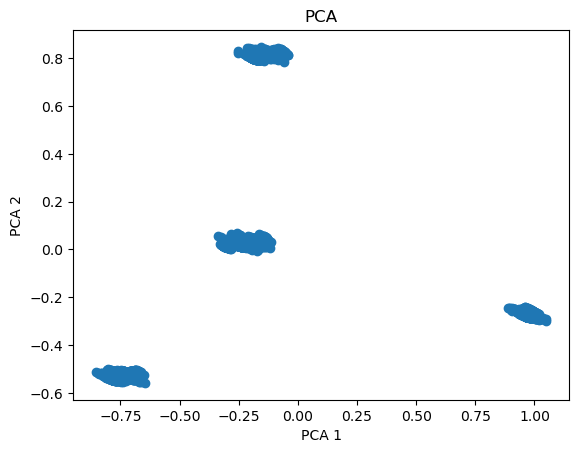

In [193]:
#PCA Analysi with Three components
pca = PCA(n_components= 3) 
x_pca = pca.fit_transform(x_train)
x_var = pca.explained_variance_ratio_

dimensions = np.arange(1,len(x_var)+1)

plt.figure(2)
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA")


In [12]:
# best_tsne = TSNE(n_components=2, perplexity=20.0,n_jobs=12)
# x_tsne = best_tsne.fit_transform(x_train)

# plt.figure(3)
# plt.scatter(x_tsne[:,0],x_tsne[:,1])
# plt.xlabel("tsne 1")
# plt.ylabel("tsne 2")
# plt.title("tSNE")



In [14]:
print("Hello")

Hello


In [253]:
print("Hello")

Hello


array([[0.79711144],
       [0.79711144],
       [0.79711144],
       ...,
       [0.03613863],
       [0.03613863],
       [0.03613863]])

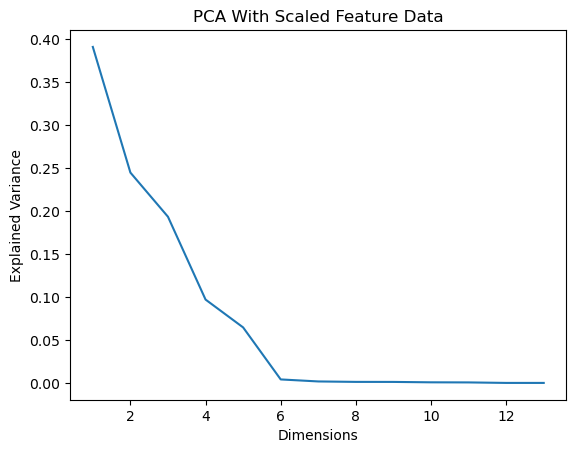

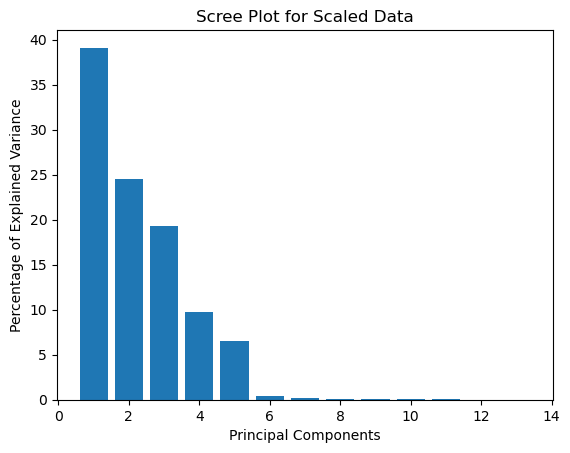

0.9905556634052961


In [252]:
#PCA with all components to find optimal number of components using Scree Plot
pca = PCA(n_components = x_train.shape[1]-1)
x_all_pca = pca.fit_transform(x_train)
x_variance = pca.explained_variance_ratio_
dimensions = np.arange(1,len(x_variance)+1)


labels = ["PC" + str(x) for x in range(1,len(x_variance)+1)]

plt.figure(1)
plt.plot(dimensions,x_variance)
plt.title("PCA With Scaled Feature Data")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")

plt.figure(2)
plt.bar(x=range(1,len(x_variance)+1),
        height=np.round(x_variance * 100,decimals=1),label=labels)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained Variance")
plt.title("Scree Plot for Scaled Data")

plt.show()
print(sum(x_variance[:5]))

In [255]:
pca = PCA(n_components=6)
pca.fit(x_train)
x_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_val_pca = pca.transform(x_validation)
x_train.shape,y_train.shape

((135812, 14), (135812, 1))

# Model Training

Training Error:
MSE: 0.0025738295594784043
R2: 0.9443324042848579

Test Error:
MSE: 0.0025770655320641682
R2: 0.9441397368706748


Text(0.5, 1.0, 'Linear Regression')

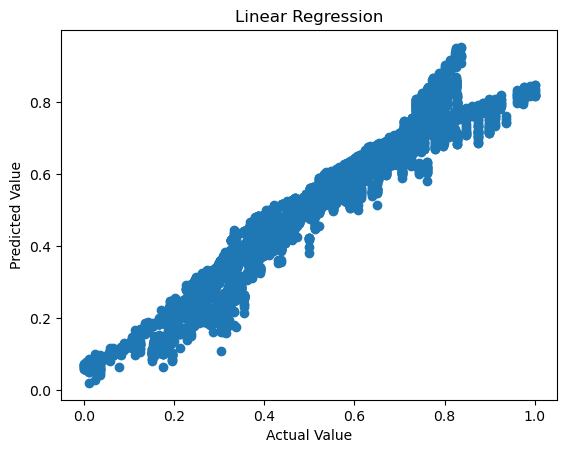

In [256]:
#Linear Regression MOdel
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_pca,y_train)

y_pred = model.predict(x_pca)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Training Error:")
print("MSE:",mse)
print("R2:",r2)

y_pred = model.predict(x_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTest Error:")
print("MSE:",mse)
print("R2:",r2)


plt.scatter(y_test,y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression")

/Users/usmanbaqai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 3.7303950227353896e-06
R2: 0.9999191402605198
RMSE: 0.001931423056384952


Text(0.5, 1.0, 'Random Forest Regression')

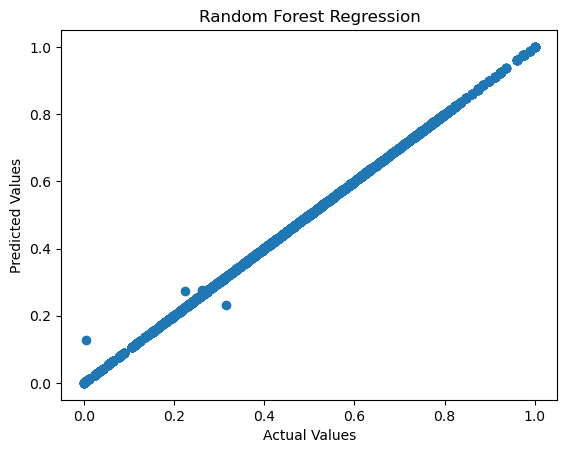

In [236]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,n_jobs=12)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:",mse)
print("R2:",r2)
print("RMSE:",np.sqrt(mse))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression")

Hyperparameter tuning with Optuna for Random Forest

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators',10,500)
    max_features = trial.suggest_categorical("max_features",[None, "sqrt","log2"])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    max_depth = trial.suggest_int("max_depth", 2, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_features=max_features,
                                  bootstrap=bootstrap,
                                  max_depth=max_depth,
                                  min_samples_leaf= min_samples_leaf,
                                  min_samples_split= min_samples_split,
                                  random_state=42,
                                  n_jobs=10)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_validation)
    
    score = mean_squared_error(y_validation,y_pred)

    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200,show_progress_bar=True,n_jobs=12)

best_params = study.best_params


In [ ]:
best_params
best_rf = RandomForestRegressor(n_estimators=60,
                                max_features='sqrt',
                                bootstrap=True,
                                max_depth=5,
                                min_samples_split=10,
                                min_samples_leaf=9)
best_rf.fit(x_train,y_train)
y_pred = best_rf.predict(x_test)
print("R2 Score",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [20]:
np.random.seed(42)
from sklearn.metrics import mean_squared_error, r2_score


Hello


In [198]:
#Neural Network
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K

np.random.seed(42)
tf.random.set_seed(42)

l2_rate = 0.0011795571890745409
dropout_rate = 0.36587672116645936

model = tf.keras.Sequential([
    (keras.layers.Input(shape=x_train.shape[1],)),
    (keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(l2_rate))),
     Dropout(dropout_rate),
    (keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(l2_rate))),
     Dropout(dropout_rate),
    (keras.layers.Dense(1,activation='linear'))
])
early_stopping = EarlyStopping(monitor='val_mse',
                               restore_best_weights=True,
                               patience=3,
                               min_delta = 0.00001
                               )
learning_rate = 3.391689268650363e-05
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)


model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mse']
              
)

history = model.fit(x_train, y_train, 
                    epochs=11, 
                    verbose=1,
                    validation_data=(x_validation,y_validation),
                    callbacks=[early_stopping])


Epoch 1/11
4245/4245 [==============================] - 3s 664us/step - loss: 0.1582 - mse: 0.0458 - val_loss: 0.0692 - val_mse: 0.0028
Epoch 2/11
4245/4245 [==============================] - 3s 618us/step - loss: 0.0507 - mse: 0.0085 - val_loss: 0.0254 - val_mse: 0.0016
Epoch 3/11
4245/4245 [==============================] - 3s 622us/step - loss: 0.0198 - mse: 0.0050 - val_loss: 0.0102 - val_mse: 0.0012
Epoch 4/11
4245/4245 [==============================] - 3s 635us/step - loss: 0.0104 - mse: 0.0039 - val_loss: 0.0060 - val_mse: 0.0011
Epoch 5/11
4245/4245 [==============================] - 3s 623us/step - loss: 0.0076 - mse: 0.0035 - val_loss: 0.0045 - val_mse: 0.0010
Epoch 6/11
4245/4245 [==============================] - 3s 621us/step - loss: 0.0063 - mse: 0.0032 - val_loss: 0.0037 - val_mse: 9.6082e-04
Epoch 7/11
4245/4245 [==============================] - 3s 624us/step - loss: 0.0055 - mse: 0.0030 - val_loss: 0.0033 - val_mse: 0.0010
Epoch 8/11
4245/4245 [======================

213/213 [==============================] - 0s 338us/step
Test Metrics:
R2: 0.98
MSE: 0.00096
4245/4245 [==============================] - 1s 268us/step

Training Metrics:
R2: 0.98
MSE: 0.00095
849/849 [==============================] - 0s 297us/step

Validation Metrics:
R2: 0.98
MSE: 0.00095


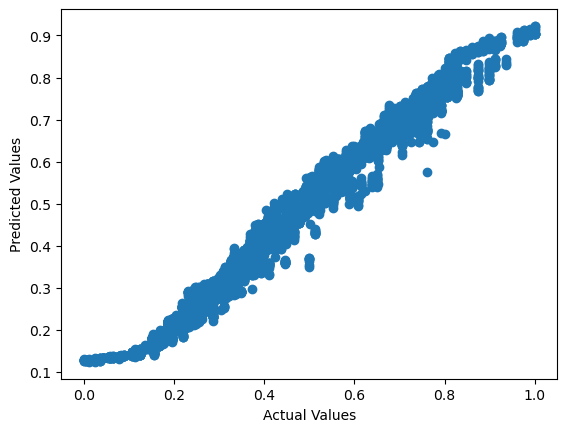

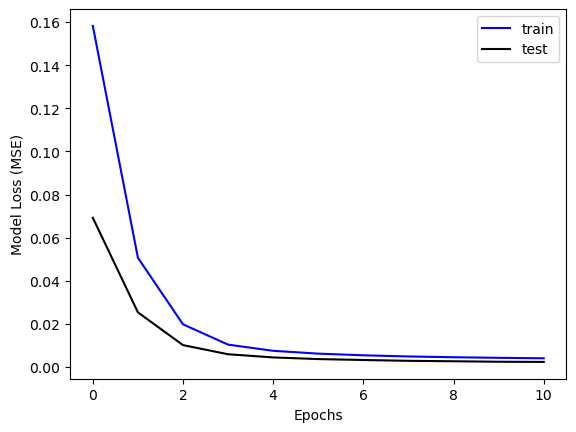

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [199]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse =mean_squared_error(y_test,y_pred)

plt.figure(2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

print("Test Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

y_pred = model.predict(x_train)
r2 = r2_score(y_train,y_pred)
mse =mean_squared_error(y_train,y_pred)

print("\nTraining Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

y_pred = model.predict(x_validation)
r2 = r2_score(y_validation,y_pred)
mse =mean_squared_error(y_validation,y_pred)

print("\nValidation Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

plt.figure(1)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'k')
plt.xlabel("Epochs")
plt.ylabel("Model Loss (MSE)")
plt.legend(['train', 'test'])


plt.show()

print(history.history.keys())

In [200]:
#Set random seed to 42 for consistent results
np.random.seed(42)
tf.random.set_seed(42)
x_train.shape,y_train.shape,x_validation.shape,y_validation.shape

((135812, 14), (135812, 1), (27163, 14), (27163, 1))

In [207]:

def define_model(trial):
    n_layers = trial.suggest_int('n_layers',2,4)
    input_features = x_train.shape[1]
    output_features = 1
    learning_rate = trial.suggest_float('learning_rate',1e-6,1e-1,log=True)
    l2_rate = trial.suggest_float('l2_rate',1e-3,0.1,log=True)
    

    model = keras.Sequential()
    model.add(keras.Input(input_features,))
    
    
    for i in range(n_layers):
        num_neurons = trial.suggest_int("num_neurons_l{}".format(i),4,256)
        model.add(Dense(num_neurons,
                        activation = 'relu',
                        kernel_regularizer=keras.regularizers.l2(l2_rate)))
        dropout = trial.suggest_float("dropout_l{}".format(i),0.2,0.5)
        model.add(Dropout(dropout))  

    
    model.add(Dense(output_features,activation='linear'))
    
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics = ['mse']
                  )
    
    return model


        
        

In [208]:
def objective(trial):
    
    model = define_model(trial)
    epochs = trial.suggest_int('epochs',10,100)
    early_stopping = EarlyStopping(monitor='val_mse',
                               restore_best_weights=True,
                               patience=3,
                               min_delta = 0.00001
                               )
    
   
    model.fit(x_train, y_train, 
              validation_data=(x_validation, y_validation), 
              epochs=epochs, 
              verbose=0,
              callbacks = [early_stopping])

    y_pred = model.predict(x_validation)
    
    mse_val = mean_squared_error(y_validation,y_pred)
    r2_val = r2_score(y_validation,y_pred)
    
    score = mse_val
    
    trial.report(score,epochs)
    
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100,show_progress_bar=True,gc_after_trial=True,n_jobs=10)

    

[I 2023-11-13 21:01:50,693] A new study created in memory with name: no-name-9db86c28-f384-4854-b712-7ccc1e2a2c16


  0%|          | 0/100 [00:00<?, ?it/s]

849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 21:03:05,216] Trial 7 finished with value: 0.0026279469134214218 and parameters: {'n_layers': 2, 'learning_rate': 0.010644446591670213, 'l2_rate': 0.0032887106151666874, 'num_neurons_l0': 200, 'dropout_l0': 0.27071060225115706, 'num_neurons_l1': 167, 'dropout_l1': 0.20542661287472147, 'epochs': 75}. Best is trial 7 with value: 0.0026279469134214218.
[I 2023-11-13 21:03:09,069] Trial 3 finished with value: 0.005471856867061107 and parameters: {'n_layers': 4, 'learning_rate': 0.003604435678434373, 'l2_rate': 0.007992359255541709, 'num_neurons_l0': 53, 'dropout_l0': 0.43033082632370845, 'num_neurons_l1': 25, 'dropout_l1': 0.3658921648953447, 'num_neurons_l2': 200, 'dropout_l2': 0.4351583108663464, 'num_neurons_l3': 93, 'dropout_l3': 0.4889433196436779, 'epochs': 26}. Best is trial 7 with value: 0.0026279469134214218.
849/849 [==============================] - 2s 3ms/step
[I 2023-11-13 21:03:36,498] Trial 8 finished with 

849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 22:04:55,300] Trial 5 finished with value: 0.0033345383950121117 and parameters: {'n_layers': 4, 'learning_rate': 1.2151333995006455e-06, 'l2_rate': 0.005304634654609904, 'num_neurons_l0': 173, 'dropout_l0': 0.35261535923837206, 'num_neurons_l1': 159, 'dropout_l1': 0.30376295795247177, 'num_neurons_l2': 170, 'dropout_l2': 0.32256009451856626, 'num_neurons_l3': 156, 'dropout_l3': 0.3147125488235615, 'epochs': 73}. Best is trial 1 with value: 0.001249283231954384.
[I 2023-11-13 22:04:57,008] Trial 23 finished with value: 0.0011174316579576047 and parameters: {'n_layers': 3, 'learning_rate': 3.8093694190909145e-05, 'l2_rate': 0.0011436038917165701, 'num_neurons_l0': 92, 'dropout_l0': 0.40208119532038655, 'num_neurons_l1': 151, 'dropout_l1': 0.4910238212496809, 'num_neurons_l2': 104, 'dropout_l2': 0.21287409201953048, 'epochs': 49}. Best is trial 23 with value: 0.0011174316579576047.
849/849 [=============================

[I 2023-11-13 22:11:55,988] Trial 36 finished with value: 0.0012626656557637192 and parameters: {'n_layers': 2, 'learning_rate': 0.00017094840264619523, 'l2_rate': 0.0018575579380314985, 'num_neurons_l0': 23, 'dropout_l0': 0.3307986562540588, 'num_neurons_l1': 64, 'dropout_l1': 0.3449625052228762, 'epochs': 38}. Best is trial 28 with value: 0.0009549653014068559.
849/849 [==============================] - 2s 3ms/step
[I 2023-11-13 22:12:52,031] Trial 42 finished with value: 0.0017152128845329985 and parameters: {'n_layers': 2, 'learning_rate': 6.012580254560313e-05, 'l2_rate': 0.0027329301524284502, 'num_neurons_l0': 22, 'dropout_l0': 0.3276937615687293, 'num_neurons_l1': 118, 'dropout_l1': 0.34481203558263057, 'epochs': 37}. Best is trial 28 with value: 0.0009549653014068559.
849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 22:13:26,272] Trial 37 pruned. 
849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 22:13:44,260] Trial 48 finished with value

849/849 [==============================] - 2s 3ms/step
[I 2023-11-13 22:43:00,675] Trial 72 finished with value: 0.0009648582968846641 and parameters: {'n_layers': 3, 'learning_rate': 1.0034394432795959e-05, 'l2_rate': 0.0010018736593734544, 'num_neurons_l0': 84, 'dropout_l0': 0.35959356907004336, 'num_neurons_l1': 204, 'dropout_l1': 0.45170495674788264, 'num_neurons_l2': 220, 'dropout_l2': 0.23038632530413855, 'epochs': 33}. Best is trial 28 with value: 0.0009549653014068559.
849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 22:43:33,148] Trial 78 pruned. 
849/849 [==============================] - 3s 3ms/step
[I 2023-11-13 22:44:20,929] Trial 81 finished with value: 0.0012473362083744715 and parameters: {'n_layers': 3, 'learning_rate': 9.05899345149916e-06, 'l2_rate': 0.0017319516147626956, 'num_neurons_l0': 172, 'dropout_l0': 0.3505967510009278, 'num_neurons_l1': 200, 'dropout_l1': 0.45376795264329994, 'num_neurons_l2': 151, 'dropout_l2': 0.22295713629556033, 'epo

849/849 [==============================] - 0s 266us/step
[I 2023-11-13 22:50:18,578] Trial 98 finished with value: 0.0009719542997727669 and parameters: {'n_layers': 2, 'learning_rate': 0.0001228023230108704, 'l2_rate': 0.0019997970135919255, 'num_neurons_l0': 38, 'dropout_l0': 0.3389402935887096, 'num_neurons_l1': 234, 'dropout_l1': 0.48292157548769793, 'epochs': 55}. Best is trial 96 with value: 0.0007490382636600264.


In [210]:
best_params = study.best_params
best_trial = study.best_trial.params
best_params,study.best_value

({'n_layers': 2,
  'learning_rate': 0.0001320407233742346,
  'l2_rate': 0.0011847419262448185,
  'num_neurons_l0': 155,
  'dropout_l0': 0.3720539485534994,
  'num_neurons_l1': 232,
  'dropout_l1': 0.44294704401241997,
  'epochs': 41},
 0.0007490382636600264)

In [211]:
best_params = study.best_params
best_trial = study.best_trial.params

def best_model(trial):
    input_features = x_train.shape[1]
    output_features = 1
    
    model = keras.Sequential()
    model.add(keras.Input(input_features,))
    
    n_layers = trial['n_layers']
    l2_rate = trial['l2_rate']
    learning_rate = trial['learning_rate']
    
    for i in range(n_layers):
        neuron_name = "num_neurons_l{}".format(i)
        num_neurons = trial[neuron_name]
        
        dropout_name = "dropout_l{}".format(i)
        dropout_rate = trial[dropout_name]
        
        model.add(Dense(num_neurons,
                        activation = 'relu',
                        kernel_regularizer=keras.regularizers.l2(l2_rate)))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1,activation='linear'))
    optimizer = keras.optimizers.legacy.Adam(learning_rate = learning_rate)
        
    model.compile(optimizer=optimizer,
                 loss='mean_squared_error',
                 metrics = ['mse'])
        
    
    return model

model = best_model(best_trial)
history = model.fit(x_train, y_train, 
          validation_data=(x_validation, y_validation), 
          epochs=best_params['epochs'], 
          verbose=1)


Epoch 1/41
4245/4245 [==============================] - 4s 801us/step - loss: 0.0649 - mse: 0.0100 - val_loss: 0.0082 - val_mse: 0.0011
Epoch 2/41
4245/4245 [==============================] - 3s 817us/step - loss: 0.0062 - mse: 0.0028 - val_loss: 0.0030 - val_mse: 0.0010
Epoch 3/41
4245/4245 [==============================] - 3s 777us/step - loss: 0.0040 - mse: 0.0023 - val_loss: 0.0023 - val_mse: 9.1920e-04
Epoch 4/41
4245/4245 [==============================] - 3s 773us/step - loss: 0.0034 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0010
Epoch 5/41
4245/4245 [==============================] - 3s 797us/step - loss: 0.0032 - mse: 0.0021 - val_loss: 0.0018 - val_mse: 7.9971e-04
Epoch 6/41
4245/4245 [==============================] - 3s 795us/step - loss: 0.0030 - mse: 0.0020 - val_loss: 0.0018 - val_mse: 8.7976e-04
Epoch 7/41
4245/4245 [==============================] - 3s 773us/step - loss: 0.0029 - mse: 0.0020 - val_loss: 0.0017 - val_mse: 8.4213e-04
Epoch 8/41
4245/4245 [==========

In [174]:
y_pred = model.predict(x_test)
y_pred.shape,y_test.shape

1000/1000 [==============================] - 0s 304us/step


((31991, 1), (31991, 1))

213/213 [==============================] - 0s 365us/step
Test Metrics:
R2: 0.99
MSE: 0.00061
4245/4245 [==============================] - 1s 289us/step

Training Metrics:
R2: 0.99
MSE: 0.0006
849/849 [==============================] - 0s 299us/step

Validation Metrics:
R2: 0.99
MSE: 0.00061


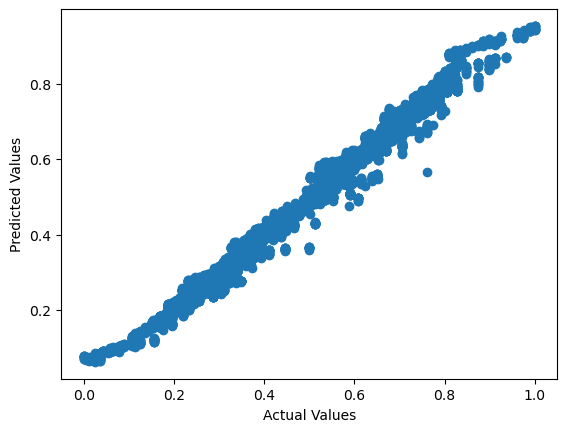

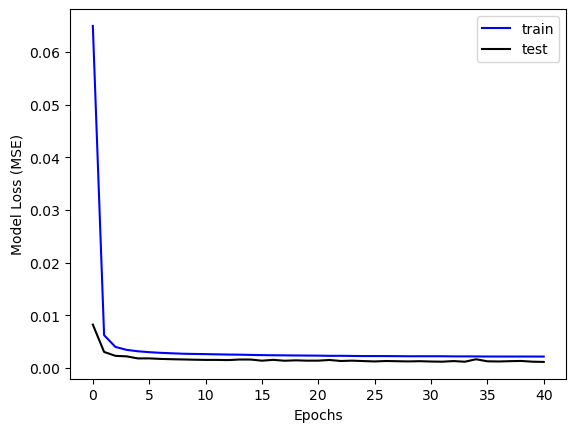

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


In [212]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test,y_pred)
mse =mean_squared_error(y_test,y_pred)

plt.figure(2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

print("Test Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

y_pred = model.predict(x_train)
r2 = r2_score(y_train,y_pred)
mse =mean_squared_error(y_train,y_pred)

print("\nTraining Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

y_pred = model.predict(x_validation)
r2 = r2_score(y_validation,y_pred)
mse =mean_squared_error(y_validation,y_pred)

print("\nValidation Metrics:")
print("R2:",np.round(r2,2))
print("MSE:",np.round(mse,5))

plt.figure(1)
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'k')
plt.xlabel("Epochs")
plt.ylabel("Model Loss (MSE)")
plt.legend(['train', 'test'])


plt.show()

print(history.history.keys())